# Modelling Catalysis of Izomerization #
## Introduction ##
Catalysis is the increase in the rate of an otherwise slow chemical reaction, achieved by introducing an external substance (called catalyst).
Catalysis assumes that the catalyst will remain unmodified once the chemical reaction completes, but will allow the chemical transition to proceed at an increased rate.
It is commonly assumed that catalysis occures due to a decrease in the activation energy of a reaction, caused by the presence of the catalyst, facilitating its progress.

Here we present a simple model of a substrate with two stable conformations, a high energy conformation and a low energy conformation, seperated by an activation energy barrier.
We introduce a catalyst that is able to eliminate the activation energy barrier completely, facilitating the transition of the substrate from its high energy state to its low energy state.
Our model demonstrates that, in principle, a catalyst can not only reduce the activation energy of a reaction, but can eliminate it completely, causing the potential energy of the transition state to be lower than the high energy state, but higher than the low energy state.

First some initialization code...




In [2]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

Populating the interactive namespace from numpy and matplotlib


## The model ##
Our model is two dimensional, and consists of point charges confined to move on lines in the plain, analogous to steric or other limitations in the molecular world.

### The substrate ###
Our substrate consists of two, oppositely charged point charges residing in a rectangle (see figure below, green).
One charge, termed the 'reaction center' is fixed inside the rectangle (red).
The other charge, termed the 'state point' (black) is confined to move along an angled line (blue) residing inside the rectangle.
The energy of any conformation of the substrate is defined as the potential energy of the two charges with respect to each other:
$$E_p=\frac{q_1q_2}{r}$$
Every conformation can be described by a 'state angle' (magenta) that uniquely defines the location of the state point along the angled conformations line.

To accurately draw the substrate we first need to set some parameters that will be used in the calculations further below.
These parameters are annotated in the figure below the code block.

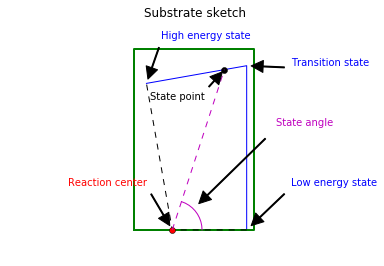

In [3]:
StaticAngle=80/360*2*pi # The angle at the top-right of the substrate is 80 degrees.
LowStateDist=0.5        # The distance of the 'reaction center' charge from the right plane,
                        # determining the energy of the low energy state.
HighStateDist=1         # The distance of the 'reaction center' charge from the top plane,
                        # determining the energy of the high energy state.

StaticAngComplement=pi-StaticAngle
MaxAngle=arctan((HighStateDist/LowStateDist-cos(StaticAngComplement))/
                sin(StaticAngComplement))   # The angle of the
                                            # transition state.
ReactionCenterLoc = [0,0]   # We place the 'reaction center' at the origin 
                            # and calculate the location of the other points.

def transitionCoords(angle):    # Given an angle relative to 3 O'clock
                                # from the reaction center, the function
                                # returns the xy position of the state point
    global MaxAngle
    global HighStateDist
    global LowStateDist
    global StaticAngComplement
    if angle > MaxAngle:
        dist=HighStateDist/cos(StaticAngComplement-angle)
    if angle <= MaxAngle:
        dist=LowStateDist/cos(angle)
    xcoord=dist*cos(angle)
    ycoord=dist*sin(angle)
    return array([xcoord,ycoord])

LowStateLoc = [LowStateDist,ReactionCenterLoc[1]]
HighStateLoc = [HighStateDist*cos(StaticAngComplement),
                HighStateDist*sin(StaticAngComplement)]
TransitionStateLoc = [LowStateLoc[0],tan(MaxAngle)*LowStateLoc[0]]
LowerLeft = [1.5*HighStateLoc[0],ReactionCenterLoc[1]]
UpperLeft= [1.5*HighStateLoc[0],1.1*TransitionStateLoc[1]]
UpperRight= [1.1*LowStateLoc[0],1.1*TransitionStateLoc[1]]
LowerRight= [1.1*LowStateLoc[0],ReactionCenterLoc[1]]

StateLine = list(zip( * [LowStateLoc,TransitionStateLoc,HighStateLoc] ))
SubstrateBound = list(zip( * [LowerLeft,UpperLeft,UpperRight,LowerRight,LowerLeft]))
Distances = list(zip( * [LowStateLoc,ReactionCenterLoc,HighStateLoc]))

plot(StateLine[0],StateLine[1],'b')
plot(SubstrateBound[0],SubstrateBound[1],'g',linewidth=2)
plot(Distances[0],Distances[1],'k--')
annotate("Low energy state",color='b', xy=(LowStateLoc[0],LowStateLoc[1]),
         xytext=(LowStateLoc[0]+0.3,LowStateLoc[1]+0.3),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))
annotate("Transition state",color='b', 
         xy=(TransitionStateLoc[0],TransitionStateLoc[1]),
         xytext=(TransitionStateLoc[0]+0.3,TransitionStateLoc[1]),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))
annotate("High energy state",color='b', xy=(HighStateLoc[0],HighStateLoc[1]),
         xytext=(HighStateLoc[0]+0.1,HighStateLoc[1]+0.3),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

StateAngle=pi/2.5
StateLoc = transitionCoords(StateAngle)
plot(StateLoc[0],StateLoc[1],'ko')

annotate("State point", xy=(StateLoc[0],StateLoc[1]),
         xytext=(StateLoc[0]-0.5,StateLoc[1]-0.2),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

annotate("Reaction center", xy=(0,0),
         xytext=(-0.7,0.3),color='red',
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

plot(0,0,'ro')
StateAngleLine=list(zip(*[ReactionCenterLoc,StateLoc]))
plot(StateAngleLine[0],StateAngleLine[1],'m--')

## Draw the state angle
ax=[]
ay=[]
r=0.2
for a in linspace(0,StateAngle,10):
    ax.append(r*cos(a))
    ay.append(r*sin(a))
plot(ax,ay,'m')    

annotate("State angle",color='m',
         xy=(0.12,0.12),
         xytext=(0.7,0.7),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

plt.axes().set_aspect('equal', 'datalim')
ylim(-0.1,1.4)
axis('off')
title('Substrate sketch')


## Reaction energy landscape ##
In the absence of a catalyst, an energy barrier exists between the high energy state and the low energy state along the transition path, requireing an activation energy to be applied in order for the substrate to switch between the two conformations.

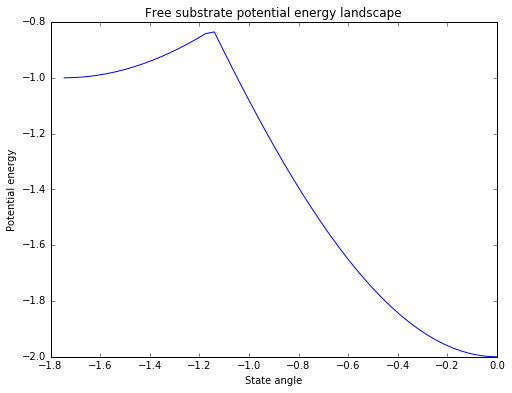

In [13]:
AngRange=linspace(StaticAngComplement,0)

def substrateEnergy(angle):
    coords = transitionCoords(angle)
    return -1/sqrt(sum(coords**2))

plot(-AngRange,[substrateEnergy(x) for x in AngRange])
figsize(8,6)
xlabel('State angle')
ylabel('Potential energy')
title('Free substrate potential energy landscape')

### The catalyst ###
Our catalyst consists of two opposing charges fixed in a rectangle (see figure below).
The upper charge has the same sign as the reaction center and the bottom charge has the same sign as the state point.


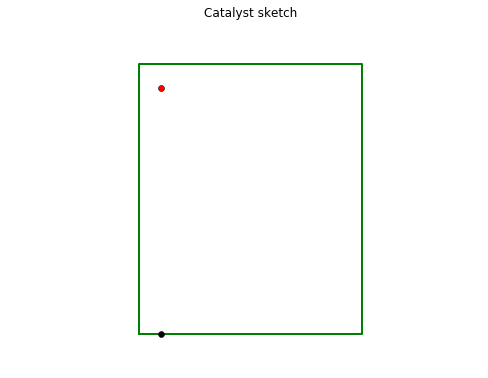

In [9]:
EnzymeHeight=TransitionStateLoc[1]
CatLowerLeft = [0,0]
CatLowerRight = [1,0]
CatUpperLeft = [0,EnzymeHeight*1.1]
CatUpperRight = [1,EnzymeHeight*1.1]
enzymeLine=list(zip(*[CatLowerLeft,CatLowerRight,
                      CatUpperRight,CatUpperLeft,CatLowerLeft]))
plot(enzymeLine[0],enzymeLine[1],'g',linewidth=2)
plot(0.1,EnzymeHeight,'ro')
plot(0.1,0,'ko')
plt.axes().set_aspect('equal', 'datalim')
ylim(-0.1,1.4)
axis('off')
title('Catalyst sketch')

## Catalyst effect on the potential energy landscape ##
In our model, the catalyst location with respect to the substrate is confined to a horizontal line , such that a single number represents the distance between the reaction center and the lower charge of the catalyst.
Because the upper charge of the catalyst attracts the state point charge and the lower charge of the catalyst attracts the reaction center, when the substrate is far from the catalyst and the state point charge is in the high energy state, the substrate will be attracted to the catalyst.
This can be seen in the figure below as the potential energy of the free substrate (blue) at its high energy state (angle=-1.8) is higher than the potential energy of the substrate at this state but in proximity to the catalyst (green).
Furthermore, as the figure below shows, at a distance of 1.45 (arbitrary units), the catalyst charges interact with the substrate charges to produce a modified energy landscape that eliminates the activation energy barrier (green line vs. blue line).
Finally, when the substrate is in the low energy state, because the state point charge is closer to the lower catalyst charge than the reaction center charge, the substrate is repelled from the catalyst.
This is reflected in the figure as at angle=0 the potential energy of the substrate in proximity to the catalyst (green) is higher than the potential energy of the free substrate (blue).

In [10]:
def absElectricPotential(loc1,loc2):    # Returns the absolute value of the electric potential energy of two charges
    return 1/sqrt(sum((loc1-loc2)**2))

def enzymeSubstrateEnergy(angle,dist):  # Calulates, given the state angle of the substrate and the distance between
                                        # the substrate and the catalyst the potential energy of the entire system
    coords = transitionCoords(angle)
    Center = array([0,0])
    EnzymeUpper = array([dist,EnzymeHeight])
    EnzymeLower = array([dist,0])
    EnzymeUpperTransition = -1*absElectricPotential(coords,EnzymeUpper)
    EnzymeLowerTransition = absElectricPotential(coords,EnzymeLower)
    EnzymeUpperCenter = absElectricPotential(Center,EnzymeUpper)
    EnzymeLowerCenter = -1 * absElectricPotential(Center,EnzymeLower)
    
    return  substrateEnergy(angle)+EnzymeUpperTransition+EnzymeUpperCenter+EnzymeLowerTransition+EnzymeLowerCenter


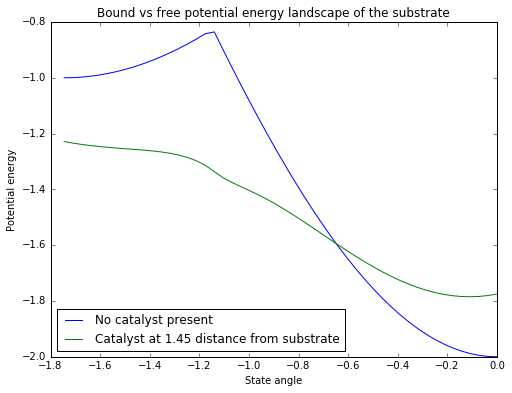

In [14]:
figsize(8,6)
plot(-AngRange,[substrateEnergy(x) for x in AngRange],label='No catalyst present')
plot(-AngRange,[enzymeSubstrateEnergy(x,1.45) for x in AngRange],label='Catalyst at 1.45 distance from substrate')
legend(loc=3)
xlabel('State angle')
ylabel('Potential energy')
title('Bound vs free potential energy landscape of the substrate')

## The complete energy landscape and expected dynamics ##
The complete energy landscape of the interaction between the substrate and the catalyst is shown below.
It depicts the potential energy of the system as a function of both the state angle and the distance between the catalyst and the substrate.
When starting at a state of high energy free substrate, the system is expected to proceed down the energy landscape to minimize its potential energy.
While not necessarily exact, the magenta line represents the expected trace of gradient decsent down the energy landscape tracing the transition of the system until it reaches a minimal potential energy point which is the unbound, low energy state, substrate.
The two energy landscapes depicted above (free substrate and bound substrate) are plotted in their respective colors in this 3D plot and represent the bounds of the energy landscape (theoretically the free enzyme is at an infinite distance from the substrate but the figure only shows the energy landscape when the distance between the two is 2, which is large enough to make the interaction negligible).

In [27]:
EnzymeXs=linspace(5*LowStateDist,1.45)  # The bounds of the distance between the
                                        # substrate and the catalyst

X,Y = meshgrid(AngRange,EnzymeXs)
Z=X.copy()
for x in range(X.shape[0]):
    for y in range(X.shape[1]):
        Z[x,y]=enzymeSubstrateEnergy(X[x,y],Y[x,y])
X=-X

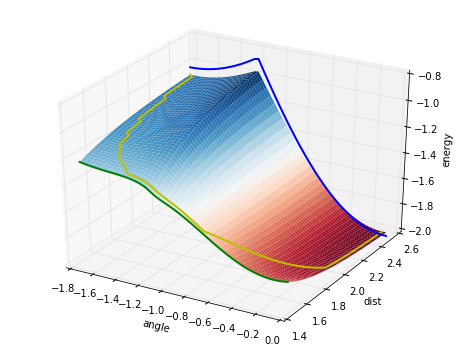

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                     cmap=cm.RdBu,linewidth=0)
ax.set_xlabel('angle')
ax.set_ylabel('dist')
ax.set_zlabel('energy')
x=0
y=0
gradx = [X[x,y]]
grady = [Y[x,y]]
gradz = [Z[x,y]]

def nextIndex(x,y):
    global X
    global Y
    global Z
    current = Z[x,y]
    for i in range(max(x-1,0),min(x+2,X.shape[0]-1)):
        for j in range(max(y-1,0),min(y+2,X.shape[1]-1)):
            if Z[i,j]<=current:
                current = Z[i,j]
                retx = i
                rety = j
    return (retx,rety)


while nextIndex(x,y) != (x,y):
    (x,y) = nextIndex(x,y)
    gradx.append(X[x,y])
    grady.append(Y[x,y])
    gradz.append(Z[x,y])
    
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
#                     cmap=cm.RdBu,linewidth=0)
ax.plot(gradx,grady,gradz,'y',linewidth=2)

ax.set_xlabel('angle')
ax.set_ylabel('dist')
ax.set_zlabel('energy')

ax.plot(-AngRange,[EnzymeXs[0]] * len(AngRange),
        [substrateEnergy(x) for x in AngRange],'b',linewidth=2)
ax.plot(-AngRange,[EnzymeXs[-1]] * len(AngRange),
        [enzymeSubstrateEnergy(x,1.45) for x in AngRange],'g',linewidth=2)

plt.show()